# 1.Import
Import fasta file with the sample proteins

In [2]:
import Proteosim_EA as ps
import pandas as pd
import random
import numpy as np
np.random.seed(42)

ModuleNotFoundError: No module named 'pandas'

In [ ]:
proteins = ps.read_fasta("data/sample_proteins.fasta")
len(proteins)

3

# 2.Protein digestion
use digest directory and Trypsin as enzyme

In [ ]:
digestion_enzyme = ps.enzyme_cleavage_patterns['Trypsin']


In [ ]:
digested_peptides_map = ps.digest_protein_collection(proteins, digestion_enzyme)

# 3.Liquid chromatography
pool peptides and predict retention times <br>
plot HPLC histogram <br>
select retention time window [0min - 20min]  <br>

['MATSR', 'YEPVAEIGVGAYGTVYK', 'DPHSGHFVALK', 'VPNGGGGGGGLPISTVR', 'EVALLR', 'LEAFEHPNVVR', 'LMDVCATSR', 'VTLVFEHVDQDLR', 'TYLDK', 'APPPGLPAETIK', 'GLDFLHANCIVHR', 'DLKPENILVTSGGTVK', 'LADFGLAR', 'IYSYQMALTPVVVTLWYR', 'APEVLLQSTYATPVDMWSVGCIFAEMFR', 'KPLFCGNSEADQLGK', 'IFDLIGLPPEDDWPR', 'DVSLPR', 'GAFPPR', 'GPRPVQSVVPEMEESGAQLLLEMLTFNPHK', 'ISAFR', 'ALQHSYLHK', 'DEGNPE', 'MEDEEK', 'AVEILGNTEAAHPPSPIR', 'CCWLR', 'CLAATSIICGCSCLGVMALVFAIK', 'SEEAVR', 'MVIEWERPR', 'MILSNTTAVTPFLTK', 'LWQETVQQGGNMSGLAR', 'SGDGK', 'LEALYVLMVLGFFGFFTLGIMLSYIR', 'LEHSNDPFNVYIESNAWQEK', 'AYVQAR', 'VLESYR', 'SCYVVENHLAIEQPNTHLPETKPSP']
Total peptides: 37


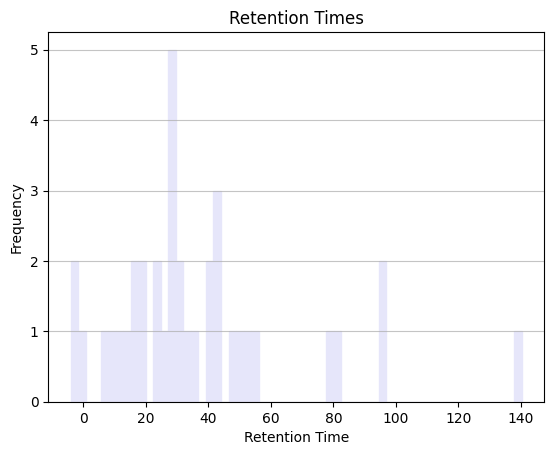

In [ ]:
pooled_peptides = []

for pro, peps in digested_peptides_map.items(): #man könnte enumerate Funktion verwenden
    pooled_peptides.extend(peps)

print(pooled_peptides)
print(f'Total peptides: {len(pooled_peptides)}')

rt_map = ps.predict_lc_retention_times(pooled_peptides)

ps.plot_retention_time(rt_map.values(), resolution=60)
select_peptides = ps.select_retention_time_window(
    peptide_rt_map= rt_map,
    lower_ret_time=0,
    upper_ret_time=20,
)

# 4. MS


## MS1 spectrum simulation

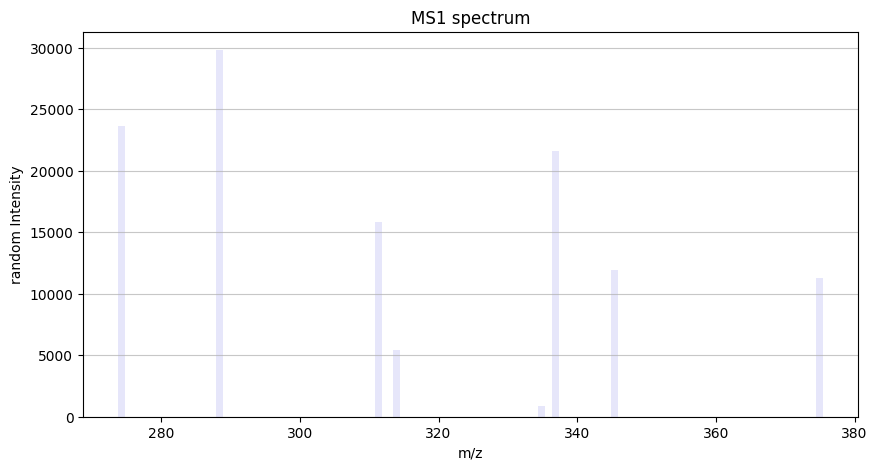

In [ ]:
amino_acid_masses = ps.amino_acid_mass_dalton
mass_map_ms1 = ps.calculate_mol_mass_collection(select_peptides, amino_acid_masses)
mz1_map = ps.calculate_mz_collection(mass_map_ms1)
ps.plot_spectrum(mz1_map.values(), random_count_range=(0, 30000), seed=42, title= "MS1 spectrum")

## MS2 spectrum simulation

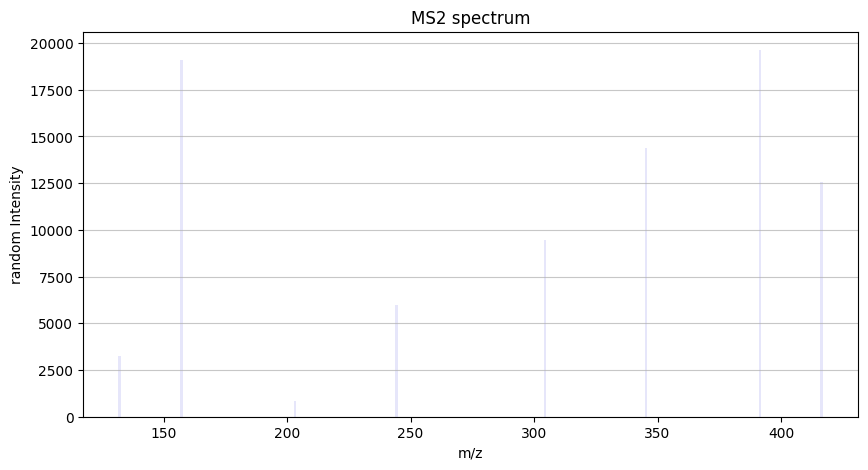

In [ ]:
mypeptide = 'MATSR'
frags = ps.fragment_peptide(mypeptide)
mass_map_ms2 = ps.calculate_mol_mass_collection(frags, amino_acid_masses)
mz2_map = ps.calculate_mz_collection(mass_map_ms2, 1)
ps.plot_spectrum(mz2_map.values(), random_count_range=(0, 20000), seed=1337, title= "MS2 spectrum")

# 5.Save files

In [ ]:
ms1_df = pd.DataFrame({'peptide': list(mz1_map.keys()), 'mz': list(mz1_map.values())})
ms1_df.to_csv('results/ms1_peptide_mzs.tsv', sep='	', index=False)

ms2_df = pd.DataFrame({'fragment': list(mz2_map.keys()), 'mz': list(mz2_map.values())})
ms2_df.to_csv('results/ms2_MATSR_fragment_mzs.tsv', sep='	', index=False)

NameError: name 'pd' is not defined